Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Lidiia Desiatkina"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        P = 0
        n = self.xk.shape[0]
        for i in range(n):
            l = 1
            for j in range(n):
                if i!= j:
                    l = l* (x - self.xk[j])/(self.xk[i] - self.xk[j])
            P = P + self.yk[i]*l
        return P

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


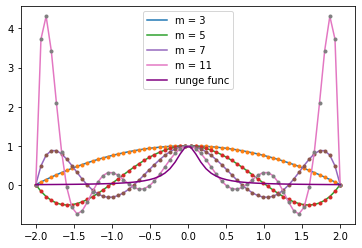

In [4]:
import matplotlib.pyplot as plt
xx = np.linspace(-2, 2, 60)
m = [3, 5, 7, 11]
for k in m:
    x1 = np.linspace(-2, 2, k)
    y1 = runge_func(x1)
    lagr = LagrangeInterpolator(x1, y1)
    yy = [lagr(xval) for xval in xx]
    plt.plot(xx, yy, label='m = %s' % k)
    plt.plot(xx, yy, '.')
plt.plot(xx, runge_func(xx), color='purple', label='runge func')
plt.legend(loc='upper center')
plt.show()

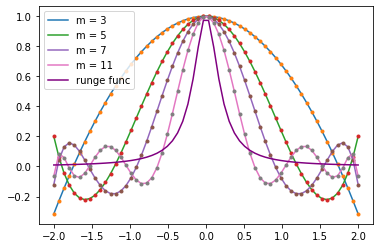

In [5]:
def Chebyshev(n):
    k = np.arange(n)
    return np.cos((2*k + 1) * np.pi / (2*n))
xx1 = np.linspace(-2, 2, 60)
m = [3, 5, 7, 11]
for k in m:
    x1 = 2*Chebyshev(k)
    y1 = runge_func(x1)
    lagr = LagrangeInterpolator(x1, y1)
    yy1 = [lagr(xval) for xval in xx1]
    plt.plot(xx1, yy1,  label='m = %s' % k)
    plt.plot(xx1, yy1, '.')
plt.plot(xx, runge_func(xx), color='purple', label='runge func')
plt.legend(loc='upper left')
plt.show()